# Task M6 T01
## Supervised Learning Algorithms: Regression

**Description:**
Exercises to practice both regressions.

#### - Exercise 1

Create at least two different regression models to try to best predict the home price (MEDV) of the attached file.

In [1]:
import pandas as pd

col_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df_housing = pd.read_csv('housing data.csv', sep=',', names=col_names, header=None)

print(df_housing.head())


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


**Data description:**
1. CRIM  per capita crime rate by town
2. ZN proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS proportion of non-retail business acres per town
4. CHAS  Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX   nitric oxides concentration (parts per 10 million)
6. RM average number of rooms per dwelling
7. AGE   proportion of owner-occupied units built prior to 1940
8. DIS   weighted distances to five Boston employment centres
9. RAD   index of accessibility to radial highways
10. TAX  full-value property-tax rate per 10,000
11. PTRATIO  pupil-teacher ratio by town
12. B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT lower status of the population
14. MEDV Median value of owner-occupied homes in 1000s

In [49]:
df_housing.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


We plot the variable to predict

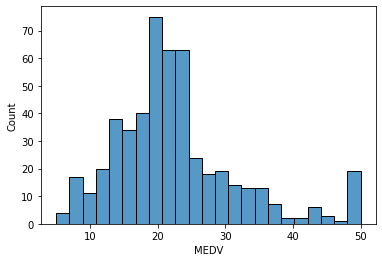

In [23]:
import seaborn as sns
sns.histplot(df_housing['MEDV']);

Here is a normal distribution for the most part, with some at the higher end of the distribution that we could explore later. Therefore, we can say that the data is not required to be standardized.

**Data preprocessing**

In [50]:
df_housing.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [51]:
df_housing.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [52]:
df_housing.shape

(506, 14)

Eliminar filas con valores faltantes (NaN):

In [53]:
df_housing.dropna(inplace=True)
df_housing.shape

(506, 14)

**Prepare the model**

We divide the dataset into train and test

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

#df_housing.columns = df_housing.columns.astype(str)

# Separamos los datos en conjuntos de entrenamiento y de prueba
X = df_housing.drop(['MEDV'], axis=1)
y = df_housing['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape); print(X_test.shape)

(404, 13)
(102, 13)


We will use the linear regression model and random forest model.

In [55]:
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

In [56]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

**Get best parameters**

In [58]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Define the pipelines
linear_pipeline = make_pipeline(StandardScaler(), LinearRegression())
rf_pipeline = make_pipeline(StandardScaler(), RandomForestRegressor())

# Define the hyperparameters you want to test for each pipeline
linear_param_grid = {'linearregression__fit_intercept': [True, False],
                     'linearregression__normalize': [True, False]}
rf_param_grid = {'randomforestregressor__n_estimators': [10, 50, 100],
                 'randomforestregressor__max_depth': [None, 5, 10]}

# Create a GridSearchCV object for each pipeline
linear_grid_search = GridSearchCV(linear_pipeline, linear_param_grid, cv=5)
rf_grid_search = GridSearchCV(rf_pipeline, rf_param_grid, cv=5)

# Fit the GridSearchCV objects to your training data
linear_grid_search.fit(X_train, y_train)
rf_grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the best score(s) for each pipeline
print("Best hyperparameters for Linear Regression: ", linear_grid_search.best_params_)
print("Best r2 score for Linear Regression: ", linear_grid_search.best_score_)

print("Best hyperparameters for Random Forest: ", rf_grid_search.best_params_)
print("Best r2 score for Random Forest: ", rf_grid_search.best_score_)

Best hyperparameters for Linear Regression:  {'linearregression__fit_intercept': True, 'linearregression__normalize': True}
Best r2 score for Linear Regression:  0.7244357342240261
Best hyperparameters for Random Forest:  {'randomforestregressor__max_depth': None, 'randomforestregressor__n_estimators': 50}
Best r2 score for Random Forest:  0.8280349205976549


#### - Exercise 2
Compare them based on MSE and R2.

In [41]:
from sklearn.metrics import mean_squared_error

lr_pred = model_lr.predict(X_test)

print("Linear Regression R²:", r2_score(y_test, lr_pred))
print("Linear Regression MSE:", mean_squared_error(y_test, lr_pred))

Linear Regression R²: 0.6687594935356294
Linear Regression MSE: 24.29111947497371


In [43]:
df_results_lr = pd.DataFrame({'MEDV': y_test, 'MEDV_pred': lr_pred})
print(df_results_lr.head())

     MEDV  MEDV_pred
173  23.6  28.996724
274  32.4  36.025565
491  13.6  14.816944
72   22.8  25.031979
452  16.1  18.769880


In [13]:
rf_pred = rf_model.predict(X_test)

print("Ramdon Forest R²:", r2_score(y_test, rf_pred))
print("Ramdon Forest MSE:", mean_squared_error(y_test, rf_pred))

Ramdon Forest R²: 0.8922527442109116
Ramdon Forest MSE: 7.901513892156864


In [16]:
df_results_rf = pd.DataFrame({'MEDV': y_test, 'MEDV_pred': rf_pred})
print(df_results_rf.head())

     MEDV  MEDV_pred
173  23.6     22.839
274  32.4     30.676
491  13.6     16.317
72   22.8     23.510
452  16.1     16.819


R²: This value indicates the **proportion of the variance of the dependent variable** (in this case, the price of the house) that can be explained by the independent variables (the characteristics of the house). An R² value of 0.646 means that approximately 64.6% of the house price variance can be explained by the house characteristics used in the model. A higher value of R² indicates a better ability of the model to explain the variability in the dependent variable.

MSE: The **mean square error** is a measure of how far the model predicted values are from the actual values. The lower the MSE, the better the model's ability to predict the actual values.

MAE: **Mean Absolute Error** is a measure of how much, on average, the model predictions deviate from the actual values. A lower MAE value indicates that the model is making more accurate predictions.

With this explanation we can determine that the random forest model in this case is the most appropriate to be able to predict future values.

#### - Exercise 3
Train them using the different parameters they support to try to improve their prediction.

In [45]:
# Tuning the Random Forest model
rf_model_tuned = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_model_tuned.fit(X_train, y_train)

rf_tuned_pred = rf_model_tuned.predict(X_test)
rf_tuned_mse = mean_squared_error(y_test, rf_tuned_pred)
rf_tuned_r2 = r2_score(y_test, rf_tuned_pred)

print('Tuned Random Forest MSE:', rf_tuned_mse, 'R2:', rf_tuned_r2)

Tuned Random Forest MSE: 7.758826923854139 R2: 0.8941984636618061


By changing the values we can have a slight improvement in the data prediction.

#### - Exercise 4
It compares its performance using the traint/test approximation or using all the data (internal validation).

In [40]:
# Training models using all data
lr_model_all = LinearRegression()
lr_model_all.fit(X, y)

rf_model_all = RandomForestRegressor(random_state=42)
rf_model_all.fit(X, y)

# Evaluating models
lr_pred_all = lr_model_all.predict(X)
rf_pred_all = rf_model_all.predict(X)

lr_mse_all = mean_squared_error(y, lr_pred_all)
rf_mse_all = mean_squared_error(y, rf_pred_all)

lr_r2_all = r2_score(y, lr_pred_all)
rf_r2_all = r2_score(y, rf_pred_all)

print('All data - Linear Regression MSE:', lr_mse_all, 'R2:', lr_r2_all)
print('All data - Random Forest MSE:', rf_mse_all, 'R2:', rf_r2_all)

All data - Linear Regression MSE: 21.894831181729202 R2: 0.7406426641094095
All data - Random Forest MSE: 1.4281525395256909 R2: 0.9830826812583119


Using the total data, an improvement in the values can be noted.

#### - Exercise 5
Do not use the number of rooms (RM) variable when making predictions.

In [42]:
# Removing the RM variable
X_no_rm = X.drop('RM', axis=1)

# Splitting the dataset
X_train_no_rm, X_test_no_rm, y_train, y_test = train_test_split(X_no_rm, y, test_size=0.2, random_state=42)

# Train a linear regression model
lr_model_no_rm = LinearRegression()
lr_model_no_rm.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_lr_no_rm = lr_model_no_rm.predict(X_test)

# Evaluate the performance of the model
mse_lr = mean_squared_error(y_test, y_pred_lr_no_rm)
r2_lr = r2_score(y_test, y_pred_lr_no_rm)

print("Linear Regression Results:")
print("MSE:", mse_lr)
print("R2:", r2_lr)


Linear Regression Results:
MSE: 24.29111947497371
R2: 0.6687594935356294


We can see that if we remove another variable, such as the number of rooms, the R2 value goes down, therefore the model is less optimal when it comes to predicting without this value.